# **MODEL TRAINING FOR STICHING**

In [424]:
from sklearn.preprocessing import RobustScaler, StandardScaler
import pandas as pd
import numpy as np
df_stitching = pd.read_csv('manufacturing_data.csv')
df_stitching.head()

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
0,2/24/2015,Q4,Stitching Unit,Tuesday,Line-S1,0.6,22.53,708.0,5040,0,0.0,0,Minor Style Revision,42.0,0.268214
1,1/19/2015,Q3,Stitching Unit,Monday,Line-F3,0.8,11.41,1028.0,4380,50,0.0,0,No Style Change,31.0,0.800359
2,1/6/2015,Q1,Finishing & Quality,Tuesday,Line-C2,0.8,2.90,NaN,1440,0,0.0,0,No Style Change,8.0,0.681061
3,2/24/2015,Q4,Finishing & Quality,Tuesday,Line-S2,0.7,3.90,NaN,960,0,0.0,0,No Style Change,8.0,0.325000
4,1/4/2015,Q1,Finishing & Quality,Sunday,Line-C1,0.8,2.90,NaN,960,0,0.0,0,No Style Change,8.0,0.667604


REMOVED SPACES FROM PRODUCTIONDEPT

In [425]:
df_stitching['productionDept'] = df_stitching['productionDept'].str.strip()

DROPPED ALL THE ROWS WHICH HAS STICHING

In [426]:
df_stitching = df_stitching[df_stitching['productionDept']!='Finishing & Quality']

VALUES IN THE PRODUCTIONDEPT

In [427]:
df_stitching['productionDept'].value_counts()

,count
productionDept,
Stitching Unit,691


In [428]:
df_stitching.describe()

,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,workerCount,efficiencyScore
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,0.723980,23.245412,1190.465991,6508.205499,44.483357,1.264834,0.639653,52.445731,0.722013
std,0.102006,6.976497,1837.455001,2864.505604,27.596591,16.712923,4.283652,9.417353,0.154784
min,0.070000,10.050000,7.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.233705
25%,0.700000,18.790000,774.500000,4560.000000,30.000000,0.000000,0.000000,52.000000,0.661470
50%,0.750000,22.520000,1039.000000,6840.000000,45.000000,0.000000,0.000000,57.000000,0.750608
75%,0.800000,28.080000,1252.500000,7200.000000,60.000000,0.000000,0.000000,58.000000,0.800402
max,0.800000,54.560000,23122.000000,25920.000000,138.000000,300.000000,45.000000,89.000000,1.100484


# **ENCODING**

LABEL ENCODE

In [429]:
from sklearn.preprocessing import LabelEncoder

L = LabelEncoder()

# Columns to encode
columns_to_encode_ord = ['productionDept', 'team']

for col in columns_to_encode_ord:
    df_stitching[col] = L.fit_transform(df_stitching[col])



ONE HOT ENCODE

In [430]:
columns_to_encode_ohe = ['fiscalQuarter', 'dayOfWeek', 'styleChangeCount']

df_stitching = pd.get_dummies(df_stitching, columns = columns_to_encode_ohe, drop_first=True, dtype=int)
df_stitching.head()

,recordDate,productionDept,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,...,fiscalQuarter_Q3,fiscalQuarter_Q4,fiscalQuarter_Q5,dayOfWeek_Saturday,dayOfWeek_Sunday,dayOfWeek_Thursday,dayOfWeek_Tuesday,dayOfWeek_Wednesday,styleChangeCount_Minor Style Revision,styleChangeCount_No Style Change
0,2/24/2015,0,9,0.60,22.53,708.0,5040,0,0.0,0,...,0,1,0,0,0,0,1,0,1,0
1,1/19/2015,0,4,0.80,11.41,1028.0,4380,50,0.0,0,...,1,0,0,0,0,0,0,0,0,1
5,2/16/2015,0,3,0.80,30.10,461.0,0,0,0.0,0,...,1,0,0,0,0,0,0,0,0,1
8,1/24/2015,0,0,0.65,22.52,1295.0,10170,26,0.0,0,...,0,1,0,1,0,0,0,0,0,1
9,3/5/2015,0,7,0.75,18.79,1228.0,6240,45,0.0,0,...,0,0,0,0,0,1,0,0,0,1


In [431]:
df_stitching.columns.tolist()

['recordDate',
 'productionDept',
 'team',
 'plannedEfficiency',
 'standardMinuteValue',
 'workInProgress',
 'overtimeMinutes',
 'performanceBonus',
 'idleMinutes',
 'idleWorkers',
 'workerCount',
 'efficiencyScore',
 'fiscalQuarter_Q2',
 'fiscalQuarter_Q3',
 'fiscalQuarter_Q4',
 'fiscalQuarter_Q5',
 'dayOfWeek_Saturday',
 'dayOfWeek_Sunday',
 'dayOfWeek_Thursday',
 'dayOfWeek_Tuesday',
 'dayOfWeek_Wednesday',
 'styleChangeCount_Minor Style Revision',
 'styleChangeCount_No Style Change']

# **CHECKING OUTLIERS**

In [432]:
try:
    df_stitching
    print('Detected existing variable `df_stitching` in the notebook; using it.')
except NameError:
    # If a CSV path was detected in the notebook, try to load it.
    csv_path = None
    if csv_path:
        print('Loading dataframe from detected CSV: ', csv_path)
        df_stitching = pd.read_csv(csv_path)
    else:
        raise RuntimeError('No dataframe `df_stitching` found in the notebook and no CSV path was detected. '
                           'If your dataset variable has a different name, either rename it to `df_stitching` or load it before running this cell.')

print('\nData snapshot:')
display(df_stitching.head())

Detected existing variable `df_stitching` in the notebook; using it.

Data snapshot:


,recordDate,productionDept,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,...,fiscalQuarter_Q3,fiscalQuarter_Q4,fiscalQuarter_Q5,dayOfWeek_Saturday,dayOfWeek_Sunday,dayOfWeek_Thursday,dayOfWeek_Tuesday,dayOfWeek_Wednesday,styleChangeCount_Minor Style Revision,styleChangeCount_No Style Change
0,2/24/2015,0,9,0.60,22.53,708.0,5040,0,0.0,0,...,0,1,0,0,0,0,1,0,1,0
1,1/19/2015,0,4,0.80,11.41,1028.0,4380,50,0.0,0,...,1,0,0,0,0,0,0,0,0,1
5,2/16/2015,0,3,0.80,30.10,461.0,0,0,0.0,0,...,1,0,0,0,0,0,0,0,0,1
8,1/24/2015,0,0,0.65,22.52,1295.0,10170,26,0.0,0,...,0,1,0,1,0,0,0,0,0,1
9,3/5/2015,0,7,0.75,18.79,1228.0,6240,45,0.0,0,...,0,0,0,0,0,1,0,0,0,1


In [433]:
print('\nDataFrame info:')
print(df_stitching.info())
num_cols = df_stitching.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_stitching.select_dtypes(include=['object','category','bool']).columns.tolist()
print(f'\nNumeric columns detected ({len(num_cols)}):', num_cols)
print(f'Categorical columns detected ({len(cat_cols)}):', cat_cols)


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, 0 to 1195
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   recordDate                             691 non-null    object 
 1   productionDept                         691 non-null    int64  
 2   team                                   691 non-null    int64  
 3   plannedEfficiency                      691 non-null    float64
 4   standardMinuteValue                    691 non-null    float64
 5   workInProgress                         691 non-null    float64
 6   overtimeMinutes                        691 non-null    int64  
 7   performanceBonus                       691 non-null    int64  
 8   idleMinutes                            691 non-null    float64
 9   idleWorkers                            691 non-null    int64  
 10  workerCount                            691 non-null    float6

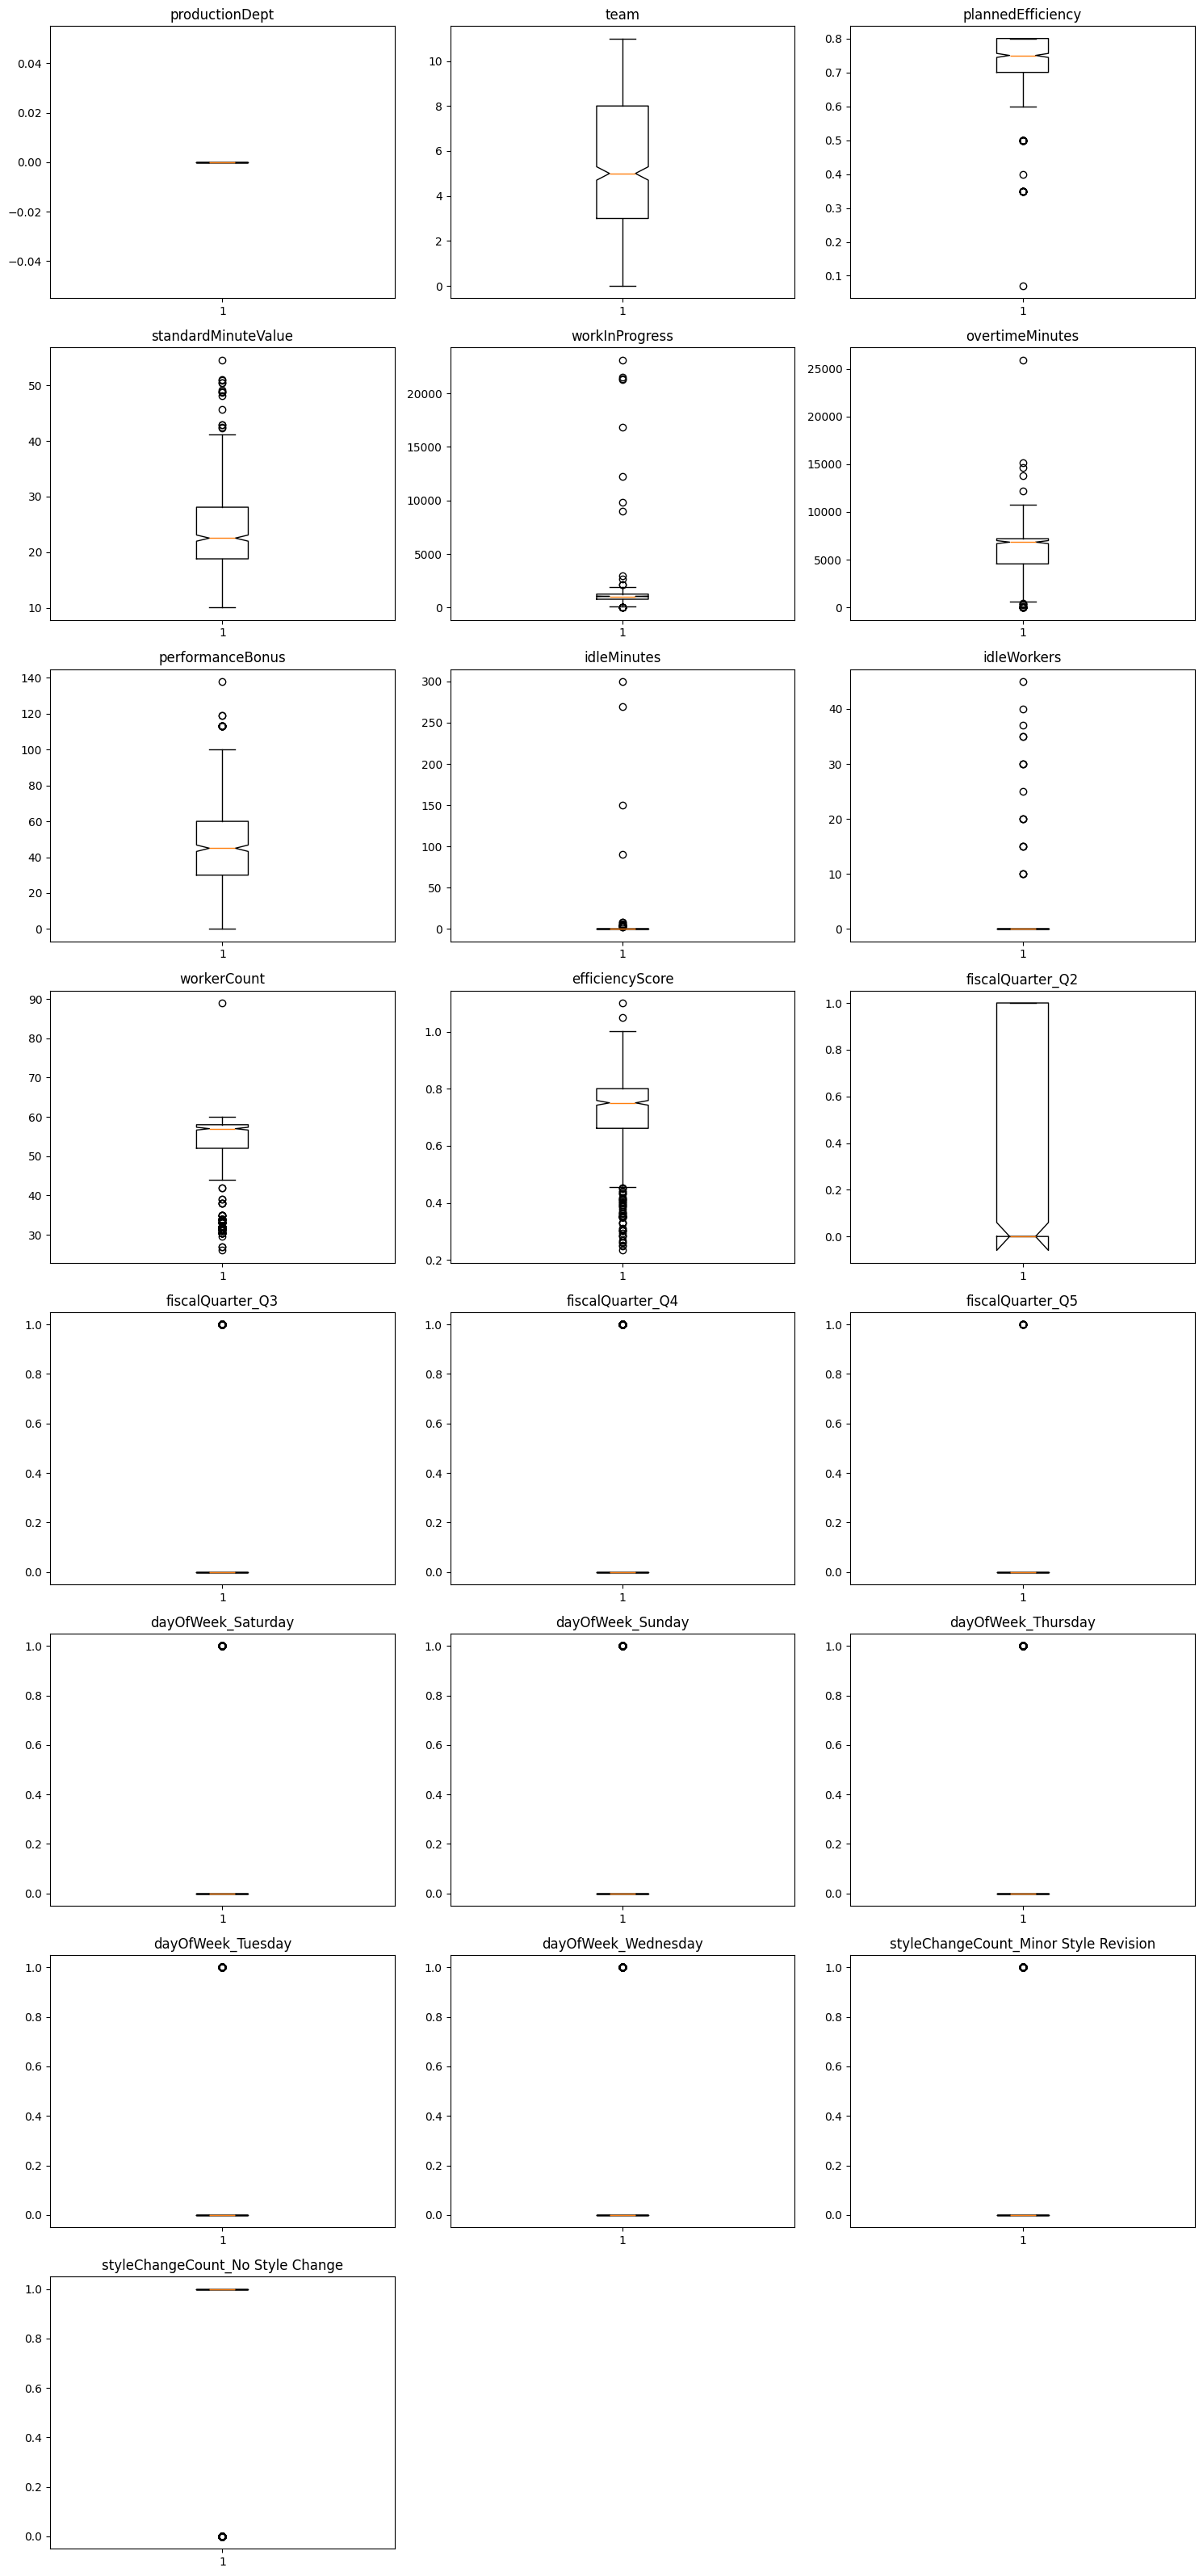

In [434]:
import math
import matplotlib.pyplot as plt
n = len(num_cols)
if n>0:
    cols_per_row = 3
    rows = math.ceil(n/cols_per_row)
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row*5, rows*4))
    axes = axes.flatten()
    for i,col in enumerate(num_cols):
        axes[i].boxplot(df_stitching[col].dropna(), vert=True, notch=True)
        axes[i].set_title(col)
    # hide any unused axes
    for j in range(n, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()
else:
    print('No numeric columns to plot boxplots for.')

In [435]:
# Outlier detection using IQR rule per numeric column
outlier_info = {}
for col in num_cols:
    s = df_stitching[col].dropna()
    if s.empty:
        outlier_info[col] = {'n':0, 'outliers':0, 'outlier_fraction':0.0}
        continue
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    if iqr == 0:
        outlier_count = 0
    else:
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outlier_count = ((s < lower) | (s > upper)).sum()
    outlier_info[col] = {'n':len(s), 'outliers':int(outlier_count), 'outlier_fraction': float(outlier_count)/len(s) if len(s)>0 else 0.0}

outlier_df = pd.DataFrame.from_dict(outlier_info, orient='index').sort_values('outlier_fraction', ascending=False)
print('\nOutlier summary (top):')
display(outlier_df.head(20))


Outlier summary (top):


,n,outliers,outlier_fraction
workerCount,691,124,0.179450
efficiencyScore,691,58,0.083936
plannedEfficiency,691,51,0.073806
overtimeMinutes,691,31,0.044863
performanceBonus,691,24,0.034732
workInProgress,691,22,0.031838
standardMinuteValue,691,15,0.021708
team,691,0,0.000000
productionDept,691,0,0.000000
idleMinutes,691,0,0.000000


# **Extracting the day and month from the recordDate column to take it as seperate features.**



In [436]:
df_stitching['recordDate'] = pd.to_datetime(df_stitching['recordDate'])
df_stitching['month'] = df_stitching['recordDate'].dt.month
df_stitching['day'] = df_stitching['recordDate'].dt.day
df_stitching.head(10)

,recordDate,productionDept,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,...,fiscalQuarter_Q5,dayOfWeek_Saturday,dayOfWeek_Sunday,dayOfWeek_Thursday,dayOfWeek_Tuesday,dayOfWeek_Wednesday,styleChangeCount_Minor Style Revision,styleChangeCount_No Style Change,month,day
0,2015-02-24,0,9,0.60,22.53,708.0,5040,0,0.0,0,...,0,0,0,0,1,0,1,0,2,24
1,2015-01-19,0,4,0.80,11.41,1028.0,4380,50,0.0,0,...,0,0,0,0,0,0,0,1,1,19
5,2015-02-16,0,3,0.80,30.10,461.0,0,0,0.0,0,...,0,0,0,0,0,0,0,1,2,16
8,2015-01-24,0,0,0.65,22.52,1295.0,10170,26,0.0,0,...,0,1,0,0,0,0,0,1,1,24
9,2015-03-05,0,7,0.75,18.79,1228.0,6240,45,0.0,0,...,0,0,0,1,0,0,0,1,3,5
10,2015-02-02,0,5,0.70,20.55,9792.0,6480,60,0.0,0,...,0,0,0,0,0,0,0,1,2,2
12,2015-01-04,0,9,0.80,26.16,1033.0,7080,63,0.0,0,...,0,0,1,0,0,0,0,1,1,4
14,2015-01-14,0,0,0.80,25.90,1150.0,10170,70,0.0,0,...,0,0,0,0,0,1,0,1,1,14
16,2015-02-12,0,10,0.80,22.52,1327.0,0,113,0.0,0,...,0,0,0,1,0,0,0,1,2,12
17,2015-02-14,0,5,0.60,11.41,1039.0,2280,23,0.0,0,...,0,1,0,0,0,0,0,0,2,14


# **FEATURE ENGINEERING**

OVERTIME RATIO

In [437]:
df_stitching['overtime_ratio'] = df_stitching['overtimeMinutes'] / (df_stitching['workInProgress'])
df_stitching['overtime_ratio']

,overtime_ratio
0,7.118644
1,4.260700
5,0.000000
8,7.853282
9,5.081433
...,...
1183,7.460317
1185,8.931876
1187,7.733026
1191,23.535109


WORKLOAD PER WORKER

In [438]:
df_stitching['workloadPerWorker'] = df_stitching['standardMinuteValue'] * df_stitching['workInProgress'] / df_stitching['workerCount']
df_stitching['workloadPerWorker']

,workloadPerWorker
0,379.791429
1,378.370323
5,235.188136
8,516.166372
9,443.733077
...,...
1183,448.029474
1185,527.190508
1187,472.984286
1191,156.512759


In [439]:
df_stitching.isnull().sum().sort_values(ascending=False)

,0
recordDate,0
productionDept,0
team,0
plannedEfficiency,0
standardMinuteValue,0
workInProgress,0
overtimeMinutes,0
performanceBonus,0
idleMinutes,0
idleWorkers,0


OVERTIME PER WORKER

In [440]:
df_stitching['overtimePerWorker'] = df_stitching['overtimeMinutes'] / df_stitching['workerCount']

# **NORMALIZATION OF FEATURES**

In [441]:
from sklearn.preprocessing import RobustScaler

features = [
    'standardMinuteValue',
    'workInProgress',
    'overtimeMinutes',
    'performanceBonus',
    'idleMinutes',
    'idleWorkers',
    'workerCount',
    'month',
    'day',
    'overtime_ratio',
    'overtimePerWorker',
    'workloadPerWorker'
]
S = RobustScaler()

df_stitching[features] = S.fit_transform(df_stitching[features])
df_stitching.head(10)



,recordDate,productionDept,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,...,dayOfWeek_Thursday,dayOfWeek_Tuesday,dayOfWeek_Wednesday,styleChangeCount_Minor Style Revision,styleChangeCount_No Style Change,month,day,overtime_ratio,workloadPerWorker,overtimePerWorker
0,2015-02-24,0,9,0.60,0.001076,-0.692469,-0.681818,-1.500000,0.0,0.0,...,0,1,0,1,0,0.0,0.800000,0.176299,-0.351816,0.000000
1,2015-01-19,0,4,0.80,-1.195910,-0.023013,-0.931818,0.166667,0.0,0.0,...,0,0,0,0,1,-1.0,0.466667,-0.448613,-0.358518,0.354839
5,2015-02-16,0,3,0.80,0.815931,-1.209205,-2.590909,-1.500000,0.0,0.0,...,0,0,0,0,1,0.0,0.266667,-1.380248,-1.033820,-2.000000
8,2015-01-24,0,0,0.65,0.000000,0.535565,1.261364,-0.633333,0.0,0.0,...,0,0,0,0,1,-1.0,0.800000,0.336934,0.291381,1.000000
9,2015-03-05,0,7,0.75,-0.401507,0.395397,-0.227273,0.000000,0.0,0.0,...,1,0,0,0,1,1.0,-0.466667,-0.269153,-0.050242,0.000000
10,2015-02-02,0,5,0.70,-0.212056,18.311715,-0.136364,0.500000,0.0,0.0,...,0,0,0,0,1,0.0,-0.666667,-1.235548,15.432067,0.000000
12,2015-01-04,0,9,0.80,0.391819,-0.012552,0.090909,0.600000,0.0,0.0,...,0,0,0,0,1,-1.0,-0.533333,0.118394,0.017148,0.000000
14,2015-01-14,0,0,0.80,0.363832,0.232218,1.261364,0.833333,0.0,0.0,...,0,0,1,0,1,-1.0,0.133333,0.553448,0.343269,1.000000
16,2015-02-12,0,10,0.80,0.000000,0.602510,-2.590909,2.266667,0.0,0.0,...,1,0,0,0,1,0.0,0.000000,-1.380248,0.308152,-2.000000
17,2015-02-14,0,5,0.60,-1.195910,0.000000,-1.727273,-0.733333,0.0,0.0,...,0,0,0,0,0,0.0,0.133333,-0.900422,-1.126463,-1.309091


# **EXTRACTING MONTH AND DAY**

In [442]:
df_stitching['recordDate'] = pd.to_datetime(df_stitching['recordDate'])
df_stitching['month'] = df_stitching['recordDate'].dt.month
df_stitching['day'] = df_stitching['recordDate'].dt.day

# **Storing all features in X and target variable in y**

In [443]:
X = df_stitching.drop(columns=['efficiencyScore', 'recordDate', 'idleMinutes', 'idleWorkers'])
y = df_stitching['efficiencyScore']

In [444]:
X

,productionDept,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,workerCount,fiscalQuarter_Q2,fiscalQuarter_Q3,...,dayOfWeek_Thursday,dayOfWeek_Tuesday,dayOfWeek_Wednesday,styleChangeCount_Minor Style Revision,styleChangeCount_No Style Change,month,day,overtime_ratio,workloadPerWorker,overtimePerWorker
0,0,9,0.60,0.001076,-0.692469,-0.681818,-1.500000,-2.500000,0,0,...,0,1,0,1,0,2,24,0.176299,-0.351816,0.000000
1,0,4,0.80,-1.195910,-0.023013,-0.931818,0.166667,-4.333333,0,1,...,0,0,0,0,1,1,19,-0.448613,-0.358518,0.354839
5,0,3,0.80,0.815931,-1.209205,-2.590909,-1.500000,0.333333,0,1,...,0,0,0,0,1,2,16,-1.380248,-1.033820,-2.000000
8,0,0,0.65,0.000000,0.535565,1.261364,-0.633333,-0.083333,0,0,...,0,0,0,0,1,1,24,0.336934,0.291381,1.000000
9,0,7,0.75,-0.401507,0.395397,-0.227273,0.000000,-0.833333,0,0,...,1,0,0,0,1,3,5,-0.269153,-0.050242,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,0,11,0.70,0.000000,0.198745,0.613636,0.166667,0.000000,0,1,...,0,1,0,0,1,1,20,0.251009,-0.029979,0.473684
1185,0,9,0.80,0.391819,0.313808,1.431818,1.000000,0.333333,1,0,...,1,0,0,0,1,1,8,0.572777,0.343375,1.000000
1187,0,1,0.60,0.856835,-0.355649,-0.045455,-1.500000,-0.166667,1,0,...,0,0,0,1,0,3,8,0.310639,0.087717,0.000000
1191,0,3,0.70,-0.058127,-1.309623,1.090909,-0.166667,0.166667,0,0,...,0,0,1,0,1,1,7,3.765889,-1.404883,0.793103


In [445]:
df_stitching.shape

(691, 28)

In [446]:
y

,efficiencyScore
0,0.268214
1,0.800359
5,0.800980
8,0.650417
9,0.750396
...,...
1183,0.750038
1185,0.850502
1187,0.600529
1191,0.700481


# **Splitting the dataset into training and testing sets**

In [447]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((552, 24), (139, 24), (552,), (139,))

# **MODELS-**

LINEAR REGRESSION

In [448]:
from sklearn.linear_model import LinearRegression

L = LinearRegression()
L.fit(X_train, y_train)

LinearRegression()

In [449]:
y_pred_linear = L.predict(X_test)

In [450]:
from sklearn.metrics import mean_squared_error, r2_score

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Mean Squared Error (Simple Linear Regression): {mse_linear}")
print(f"R-squared (Simple Linear Regression): {r2_linear}")

Mean Squared Error (Simple Linear Regression): 0.004332320358095391
R-squared (Simple Linear Regression): 0.7553150741220928


DECESION TREE REGSSOR

In [451]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)

DecisionTreeRegressor()

In [452]:
y_pred_decision = DT.predict(X_test)

In [453]:
from sklearn.metrics import mean_squared_error, r2_score

mse_decision = mean_squared_error(y_test, y_pred_decision)
r2_decision = r2_score(y_test, y_pred_decision)

print(f"Mean Squared Error (Decision Tree Regressor): {mse_decision:.5f}")
print(f"R-squared (Decision Tree Regressor): {r2_decision:.5f}")

Mean Squared Error (Decision Tree Regressor): 0.00622
R-squared (Decision Tree Regressor): 0.64858


RANDOM FOREST

In [454]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(X_train, y_train)

RandomForestRegressor()

In [455]:
y_pred_random = RF.predict(X_test)

In [456]:
from sklearn.metrics import mean_squared_error, r2_score

mse_random = mean_squared_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)

print(f"Mean Squared Error (Random Forest Regressor): {mse_random:.5f}")
print(f"R-squared (Random Forest Regressor): {r2_random:.5f}")

Mean Squared Error (Random Forest Regressor): 0.00433
R-squared (Random Forest Regressor): 0.75523


Mean Squared Error (Random Forest Regressor): 0.00433
R-squared (Random Forest Regressor): 0.75523


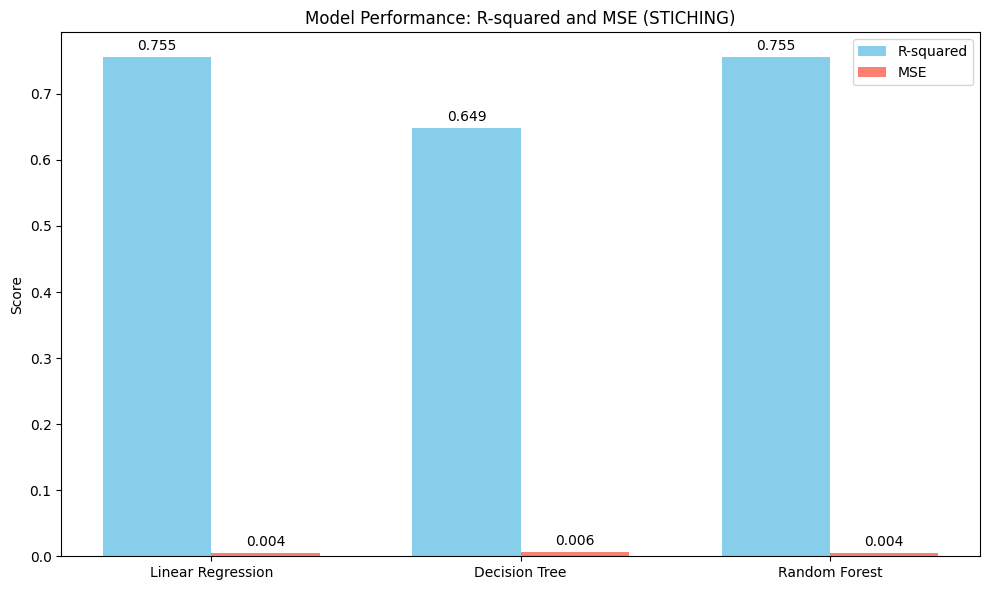

In [457]:
from sklearn.metrics import mean_squared_error, r2_score

mse_random = mean_squared_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)

print(f"Mean Squared Error (Random Forest Regressor): {mse_random:.5f}")
print(f"R-squared (Random Forest Regressor): {r2_random:.5f}")

# Create a grouped bar chart for R-squared and MSE
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
r2_scores = [r2_linear, r2_decision, r2_random]
mse_scores = [mse_linear, mse_decision, mse_random]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, r2_scores, width, label='R-squared', color='skyblue')
rects2 = ax.bar(x + width/2, mse_scores, width, label='MSE', color='salmon')

ax.set_ylabel('Score')
ax.set_title('Model Performance: R-squared and MSE (STICHING)')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add value labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

# **MODEL TRAINNING FOR FINISHING & QUALITY**

In [458]:
import pandas as pd
import numpy as np
df_finishing = pd.read_csv('manufacturing_data.csv')
df_finishing.head()

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
0,2/24/2015,Q4,Stitching Unit,Tuesday,Line-S1,0.6,22.53,708.0,5040,0,0.0,0,Minor Style Revision,42.0,0.268214
1,1/19/2015,Q3,Stitching Unit,Monday,Line-F3,0.8,11.41,1028.0,4380,50,0.0,0,No Style Change,31.0,0.800359
2,1/6/2015,Q1,Finishing & Quality,Tuesday,Line-C2,0.8,2.90,NaN,1440,0,0.0,0,No Style Change,8.0,0.681061
3,2/24/2015,Q4,Finishing & Quality,Tuesday,Line-S2,0.7,3.90,NaN,960,0,0.0,0,No Style Change,8.0,0.325000
4,1/4/2015,Q1,Finishing & Quality,Sunday,Line-C1,0.8,2.90,NaN,960,0,0.0,0,No Style Change,8.0,0.667604


In [459]:
df_finishing['productionDept'] = df_finishing['productionDept'].str.strip()

In [460]:
df_finishing = df_finishing[df_finishing['productionDept']!='Stitching Unit']

COUNTING VALUES


In [461]:
df_finishing['productionDept'].value_counts()

,count
productionDept,
Finishing & Quality,506


In [462]:
df_finishing.describe()

,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,workerCount,efficiencyScore
count,506.000000,506.000000,0.0,506.000000,506.000000,506.0,506.0,506.000000,506.000000
mean,0.737352,3.887036,NaN,1917.154150,29.644269,0.0,0.0,10.252964,0.752951
std,0.091512,0.594110,NaN,1776.698408,244.130042,0.0,0.0,4.007819,0.197021
min,0.350000,2.900000,NaN,0.000000,0.000000,0.0,0.0,2.000000,0.235795
25%,0.700000,3.900000,NaN,960.000000,0.000000,0.0,0.0,8.000000,0.631606
50%,0.750000,3.940000,NaN,1440.000000,0.000000,0.0,0.0,8.000000,0.805909
75%,0.800000,4.150000,NaN,1920.000000,0.000000,0.0,0.0,11.750000,0.906364
max,0.800000,5.130000,NaN,15000.000000,3600.000000,0.0,0.0,28.000000,1.120437


# ENCODING

LABEL ENCODING

In [463]:
from sklearn.preprocessing import LabelEncoder

L = LabelEncoder()

# Columns to encode
columns_to_encode_ord = ['productionDept', 'team']

for col in columns_to_encode_ord:
    df_finishing[col] = L.fit_transform(df_finishing[col])

One hot encoding

In [464]:
columns_to_encode_ohe = ['fiscalQuarter', 'dayOfWeek', 'styleChangeCount']

df_finishing = pd.get_dummies(df_finishing, columns = columns_to_encode_ohe, drop_first=True, dtype=int)
df_finishing.head()

,recordDate,productionDept,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,...,efficiencyScore,fiscalQuarter_Q2,fiscalQuarter_Q3,fiscalQuarter_Q4,fiscalQuarter_Q5,dayOfWeek_Saturday,dayOfWeek_Sunday,dayOfWeek_Thursday,dayOfWeek_Tuesday,dayOfWeek_Wednesday
2,1/6/2015,0,1,0.8,2.90,NaN,1440,0,0.0,0,...,0.681061,0,0,0,0,0,0,0,1,0
3,2/24/2015,0,10,0.7,3.90,NaN,960,0,0.0,0,...,0.325000,0,0,1,0,0,0,0,1,0
4,1/4/2015,0,0,0.8,2.90,NaN,960,0,0.0,0,...,0.667604,0,0,0,0,0,1,0,0,0
6,2/26/2015,0,9,0.5,3.94,NaN,3360,0,0.0,0,...,0.768847,0,0,1,0,0,0,1,0,0
7,2/28/2015,0,9,0.5,3.94,NaN,3360,0,0.0,0,...,0.768847,0,0,1,0,1,0,0,0,0


Extracting the day and month from record date to take it as a feature

In [465]:
df_finishing['recordDate'] = pd.to_datetime(df_finishing['recordDate'])
df_finishing['month'] = df_finishing['recordDate'].dt.month
df_finishing['day'] = df_finishing['recordDate'].dt.day
df_finishing.head(10)

,recordDate,productionDept,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,...,fiscalQuarter_Q3,fiscalQuarter_Q4,fiscalQuarter_Q5,dayOfWeek_Saturday,dayOfWeek_Sunday,dayOfWeek_Thursday,dayOfWeek_Tuesday,dayOfWeek_Wednesday,month,day
2,2015-01-06,0,1,0.80,2.90,NaN,1440,0,0.0,0,...,0,0,0,0,0,0,1,0,1,6
3,2015-02-24,0,10,0.70,3.90,NaN,960,0,0.0,0,...,0,1,0,0,0,0,1,0,2,24
4,2015-01-04,0,0,0.80,2.90,NaN,960,0,0.0,0,...,0,0,0,0,1,0,0,0,1,4
6,2015-02-26,0,9,0.50,3.94,NaN,3360,0,0.0,0,...,0,1,0,0,0,1,0,0,2,26
7,2015-02-28,0,9,0.50,3.94,NaN,3360,0,0.0,0,...,0,1,0,1,0,0,0,0,2,28
11,2015-01-04,0,2,0.80,3.94,NaN,6600,0,0.0,0,...,0,0,0,0,1,0,0,0,1,4
13,2015-02-19,0,11,0.50,5.13,NaN,2880,0,0.0,0,...,1,0,0,0,0,1,0,0,2,19
15,2015-01-11,0,11,0.75,4.15,NaN,1440,0,0.0,0,...,0,0,0,0,1,0,0,0,1,11
22,2015-02-08,0,9,0.80,3.94,NaN,1200,0,0.0,0,...,0,0,0,0,1,0,0,0,2,8
23,2015-02-22,0,9,0.80,3.94,NaN,2880,0,0.0,0,...,0,1,0,0,1,0,0,0,2,22


Features addition in the dataframe after the encoding.

In [466]:
df_finishing = df_finishing.drop('workInProgress', axis=1)

# Feature Engineering

overtimePerWorker

In [467]:
df_finishing['overtimePerWorker'] = df_finishing['overtimeMinutes'] / df_finishing['workerCount']
df_finishing['overtimePerWorker']

,overtimePerWorker
2,180.0
3,120.0
4,120.0
6,420.0
7,420.0
...,...
1190,120.0
1192,420.0
1193,120.0
1194,0.0


bonusPerMinute

In [468]:
df_finishing['bonusPerMinute'] = df_finishing['performanceBonus']/df_finishing['standardMinuteValue']
df_finishing['bonusPerMinute']

,bonusPerMinute
2,0.000000
3,0.000000
4,0.000000
6,0.000000
7,0.000000
...,...
1190,0.000000
1192,0.000000
1193,0.000000
1194,730.964467


Checking whether there is any null value in any column.

In [469]:
df_finishing.isnull().sum().sort_values(ascending=False)

,0
recordDate,0
productionDept,0
team,0
plannedEfficiency,0
standardMinuteValue,0
overtimeMinutes,0
performanceBonus,0
idleMinutes,0
idleWorkers,0
workerCount,0


# **FEATURE SCAILING**

In [470]:
from sklearn.preprocessing import RobustScaler

features = [
    'standardMinuteValue',
    'overtimeMinutes',
    'performanceBonus',
    'idleWorkers',
    'workerCount',
    'month',
    'day',
    'bonusPerMinute'
]
S = RobustScaler()

df_finishing[features] = S.fit_transform(df_finishing[features])
df_finishing.head(10)

,recordDate,productionDept,team,plannedEfficiency,standardMinuteValue,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,workerCount,...,fiscalQuarter_Q5,dayOfWeek_Saturday,dayOfWeek_Sunday,dayOfWeek_Thursday,dayOfWeek_Tuesday,dayOfWeek_Wednesday,month,day,overtimePerWorker,bonusPerMinute
2,2015-01-06,0,1,0.80,-4.16,0.000,0.0,0.0,0.0,0.000000,...,0,0,0,0,1,0,-1.0,-0.400000,180.0,0.0
3,2015-02-24,0,10,0.70,-0.16,-0.500,0.0,0.0,0.0,0.000000,...,0,0,0,0,1,0,0.0,0.800000,120.0,0.0
4,2015-01-04,0,0,0.80,-4.16,-0.500,0.0,0.0,0.0,0.000000,...,0,0,1,0,0,0,-1.0,-0.533333,120.0,0.0
6,2015-02-26,0,9,0.50,0.00,2.000,0.0,0.0,0.0,0.000000,...,0,0,0,1,0,0,0.0,0.933333,420.0,0.0
7,2015-02-28,0,9,0.50,0.00,2.000,0.0,0.0,0.0,0.000000,...,0,1,0,0,0,0,0.0,1.066667,420.0,0.0
11,2015-01-04,0,2,0.80,0.00,5.375,0.0,0.0,0.0,3.200000,...,0,0,1,0,0,0,-1.0,-0.533333,330.0,0.0
13,2015-02-19,0,11,0.50,4.76,1.500,0.0,0.0,0.0,1.066667,...,0,0,0,1,0,0,0.0,0.466667,240.0,0.0
15,2015-01-11,0,11,0.75,0.84,0.000,0.0,0.0,0.0,0.000000,...,0,0,1,0,0,0,-1.0,-0.066667,180.0,0.0
22,2015-02-08,0,9,0.80,0.00,-0.250,0.0,0.0,0.0,0.533333,...,0,0,1,0,0,0,0.0,-0.266667,120.0,0.0
23,2015-02-22,0,9,0.80,0.00,1.500,0.0,0.0,0.0,1.066667,...,0,0,1,0,0,0,0.0,0.666667,240.0,0.0


Storing all the feaures in the X variable and target in the y variable.

In [471]:
X = df_finishing.drop(columns=['efficiencyScore', 'recordDate', 'idleMinutes'])
y = df_finishing['efficiencyScore']

Checking X column.

In [472]:
X

,productionDept,team,plannedEfficiency,standardMinuteValue,overtimeMinutes,performanceBonus,idleWorkers,workerCount,fiscalQuarter_Q2,fiscalQuarter_Q3,...,fiscalQuarter_Q5,dayOfWeek_Saturday,dayOfWeek_Sunday,dayOfWeek_Thursday,dayOfWeek_Tuesday,dayOfWeek_Wednesday,month,day,overtimePerWorker,bonusPerMinute
2,0,1,0.8,-4.16,0.0,0.0,0.0,0.000000,0,0,...,0,0,0,0,1,0,-1.0,-0.400000,180.0,0.000000
3,0,10,0.7,-0.16,-0.5,0.0,0.0,0.000000,0,0,...,0,0,0,0,1,0,0.0,0.800000,120.0,0.000000
4,0,0,0.8,-4.16,-0.5,0.0,0.0,0.000000,0,0,...,0,0,1,0,0,0,-1.0,-0.533333,120.0,0.000000
6,0,9,0.5,0.00,2.0,0.0,0.0,0.000000,0,0,...,0,0,0,1,0,0,0.0,0.933333,420.0,0.000000
7,0,9,0.5,0.00,2.0,0.0,0.0,0.000000,0,0,...,0,1,0,0,0,0,0.0,1.066667,420.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,0,0,0.5,0.84,-0.5,0.0,0.0,0.000000,0,0,...,0,0,0,0,1,0,-1.0,1.000000,120.0,0.000000
1192,0,3,0.7,2.64,2.0,0.0,0.0,0.000000,0,0,...,0,0,0,0,1,0,1.0,-0.600000,420.0,0.000000
1193,0,4,0.5,-4.16,-0.5,0.0,0.0,0.000000,0,0,...,0,1,0,0,0,0,1.0,-0.333333,120.0,0.000000
1194,0,3,0.6,0.00,-1.5,2880.0,0.0,1.066667,1,0,...,0,0,0,0,0,0,1.0,-0.200000,0.0,730.964467


Checking the target week.

In [473]:
y

,efficiencyScore
2,0.681061
3,0.325000
4,0.667604
6,0.768847
7,0.768847
...,...
1190,0.803542
1192,0.354444
1193,0.797500
1194,0.864343


Splitting the data for training

In [474]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 21), (102, 21), (404,), (102,))

# **MODEL TRAINING-**

LINEAR REGRESSION

In [475]:
from sklearn.linear_model import LinearRegression

L = LinearRegression()
L.fit(X_train, y_train)

LinearRegression()

In [476]:
y_pred_linear = L.predict(X_test)

In [477]:
from sklearn.metrics import mean_squared_error, r2_score

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Mean Squared Error (Simple Linear Regression): {mse_linear}")
print(f"R-squared (Simple Linear Regression): {r2_linear}")

Mean Squared Error (Simple Linear Regression): 0.026288820399167953
R-squared (Simple Linear Regression): 0.2653692326339653


DECISION TREE REGRESSOR

In [478]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)

DecisionTreeRegressor()

In [479]:
y_pred_decision = DT.predict(X_test)

In [480]:
from sklearn.metrics import mean_squared_error, r2_score

mse_decision = mean_squared_error(y_test, y_pred_decision)
r2_decision = r2_score(y_test, y_pred_decision)

print(f"Mean Squared Error (Decision Tree Regressor): {mse_decision:.5f}")
print(f"R-squared (Decision Tree Regressor): {r2_decision:.5f}")

Mean Squared Error (Decision Tree Regressor): 0.04367
R-squared (Decision Tree Regressor): -0.22035


# **PUTTING HYPERPARAMETER TUNNING IS DECISION TREE**

In [481]:
param_decision = {
    'criterion': ['squared_error', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27]
}

In [482]:
from sklearn.model_selection import GridSearchCV

G_decision = GridSearchCV(DT, param_grid=param_decision, cv=5, n_jobs=-1, scoring='r2')
G_decision.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [483]:
y_pred_decision_grid = G_decision.predict(X_test)

In [484]:
from sklearn.metrics import mean_squared_error, r2_score

mse_decision_g = mean_squared_error(y_test, y_pred_decision_grid)
r2_decision_g = r2_score(y_test, y_pred_decision_grid)

print(f"Mean Squared Error (Decision Tree Regressor) after hyperparameter tuning: {mse_decision_g:.5f}")
print(f"R-squared (Decision Tree Regressor) after hyperparameter tuning: {r2_decision_g:.5f}")

Mean Squared Error (Decision Tree Regressor) after hyperparameter tuning: 0.02808
R-squared (Decision Tree Regressor) after hyperparameter tuning: 0.21540


RANDOM FOREST REGRESSOR

In [485]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(X_train, y_train)

RandomForestRegressor()

In [486]:
y_pred_random = RF.predict(X_test)

Mean Squared Error (Random Forest Regressor): 0.02246
R-squared (Random Forest Regressor): 0.37248


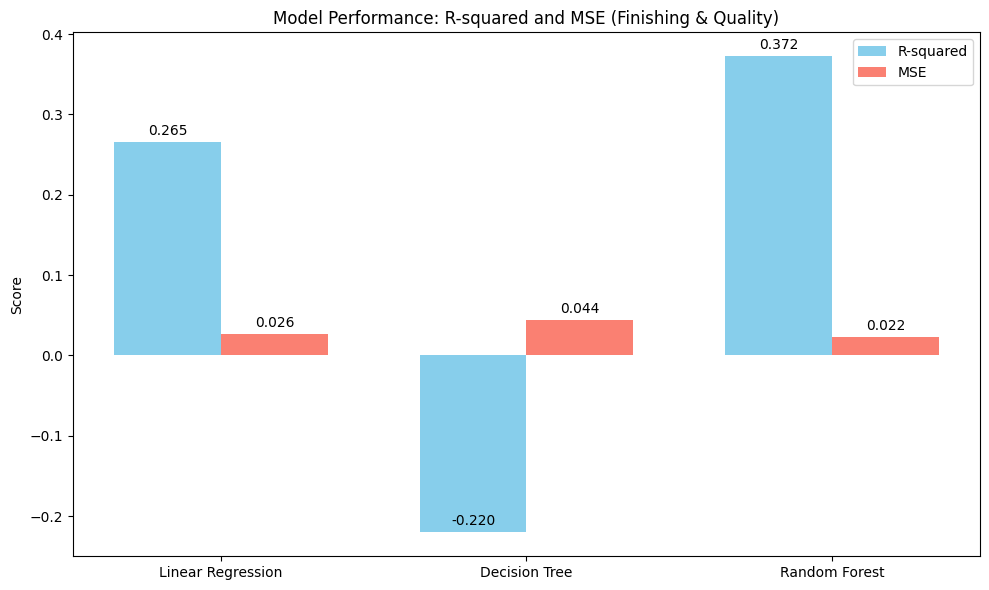

In [487]:
from sklearn.metrics import mean_squared_error, r2_score

mse_random = mean_squared_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)

print(f"Mean Squared Error (Random Forest Regressor): {mse_random:.5f}")
print(f"R-squared (Random Forest Regressor): {r2_random:.5f}")

# Create a grouped bar chart for R-squared and MSE
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
r2_scores = [r2_linear, r2_decision, r2_random]
mse_scores = [mse_linear, mse_decision, mse_random]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, r2_scores, width, label='R-squared', color='skyblue')
rects2 = ax.bar(x + width/2, mse_scores, width, label='MSE', color='salmon')

ax.set_ylabel('Score')
ax.set_title('Model Performance: R-squared and MSE (Finishing & Quality)')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add value labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()